In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.drop(['customerID'], axis = 1, inplace=True)

In [4]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# pd.to_numeric(df.TotalCharges)

In [7]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.iloc[488]['TotalCharges']

' '

In [11]:
df1 = df[df.TotalCharges != ' ']
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\nitis\AppData\Local\Temp\ipykernel_15472\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [13]:
df1.TotalCharges.dtype

dtype('float64')

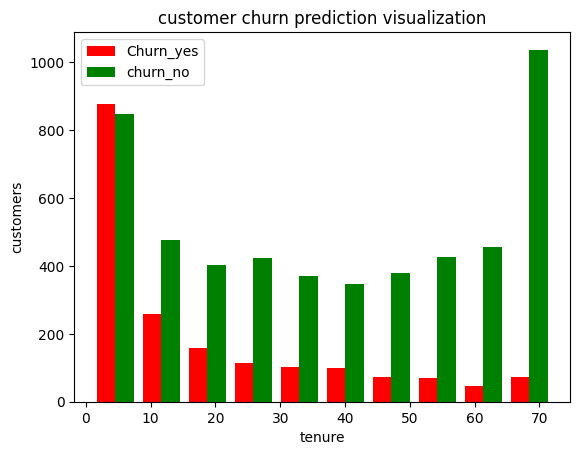

In [14]:
churn_tenure_yes = df1[df1.Churn == 'Yes'].tenure
churn_tenure_no = df1[df1.Churn == 'No'].tenure

plt.hist([churn_tenure_yes, churn_tenure_no], color=['red', 'green'], label=['Churn_yes', 'churn_no'])
plt.xlabel('tenure')
plt.ylabel('customers')
plt.title('customer churn prediction visualization')

plt.legend()

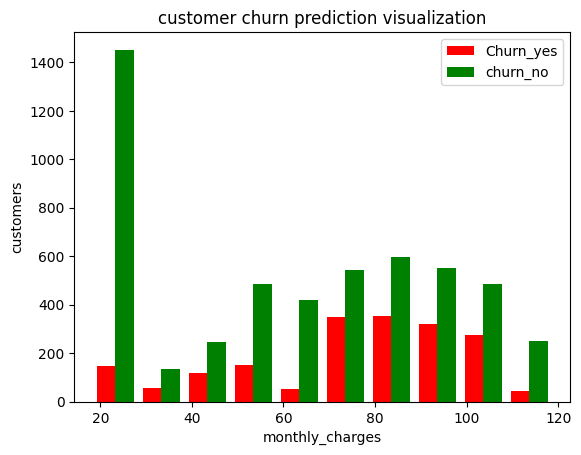

In [15]:
churn_mc_yes = df1[df1.Churn == 'Yes'].MonthlyCharges
churn_mc_no = df1[df1.Churn == 'No'].MonthlyCharges

plt.hist([churn_mc_yes, churn_mc_no], color=['red', 'green'], label=['Churn_yes', 'churn_no'])
plt.xlabel('monthly_charges')
plt.ylabel('customers')
plt.title('customer churn prediction visualization')

plt.legend()

In [16]:
def print_cols_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column]. unique()}')

In [17]:
print_cols_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
df1.replace('No internet service', 'No', inplace = True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_15472\3740710625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)


In [19]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [20]:
print_cols_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [21]:
df1.replace('No phone service', 'No', inplace = True)


C:\Users\nitis\AppData\Local\Temp\ipykernel_15472\1005940838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)


In [22]:
print_cols_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [23]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity','OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [24]:
for col in yes_no_columns:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_15472\3312920675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)


In [25]:
print_cols_values(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [26]:
for column in df1:
    print(f'{column} : {df1[column]. unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [27]:
df1['gender'].replace({'Male' : 1, 'Female' : 0}, inplace = True)

C:\Users\nitis\AppData\Local\Temp\ipykernel_15472\2349943550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Male' : 1, 'Female' : 0}, inplace = True)


In [28]:
for column in df1:
    print(f'{column} : {df1[column]. unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [29]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [30]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
826,1,1,1,0,7,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
5065,1,1,0,0,33,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1981,0,0,1,0,58,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
4083,0,1,1,0,68,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6255,1,1,1,0,69,1,1,1,0,1,...,0,1,0,0,1,0,0,0,0,1


In [34]:
for column in df2:
    print(f'{column} : {df2[column]. unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [35]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges', ]

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [37]:
for column in df2:
    print(f'{column} : {df2[column]. unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [38]:
X = df2.drop(['Churn'], axis =1)
y = df2['Churn']

In [39]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=5)

In [40]:
y_train

4544    1
5992    1
2138    0
4082    1
4155    0
       ..
3051    0
1730    1
4086    0
2259    0
2920    0
Name: Churn, Length: 5274, dtype: int64

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam',
             loss= 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
165/165 [==============================] - 2s 3ms/step - loss: 0.4963 - accuracy: 0.7584
Epoch 2/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.7914
Epoch 3/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4211 - accuracy: 0.7983
Epoch 4/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4165 - accuracy: 0.7994
Epoch 5/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4148 - accuracy: 0.8000
Epoch 6/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4135 - accuracy: 0.8036
Epoch 7/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8034
Epoch 8/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8060
Epoch 9/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8087
Epoch 10/100
165/165 [==============================] - 0s 3ms/step - loss: 0.4091 - accura

165/165 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8199
Epoch 82/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3864 - accuracy: 0.8221
Epoch 83/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8199
Epoch 84/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.8208
Epoch 85/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3847 - accuracy: 0.8212
Epoch 86/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8214
Epoch 87/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.8195
Epoch 88/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3852 - accuracy: 0.8212
Epoch 89/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.8221
Epoch 90/100
165/165 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 

In [42]:
model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7838


[0.4521532356739044, 0.7838453054428101]

In [43]:
y_pred = model.predict(X_test)

55/55 [==============================] - 0s 887us/step


In [44]:
y_pred[:5]

array([[0.4606162 ],
       [0.5276095 ],
       [0.0099291 ],
       [0.73718065],
       [0.49056002]], dtype=float32)

In [45]:
y_pre = []
for i in y_pred:
    if i <0.5:
        y_pre.append(0)
    else:
        y_pre.append(1)

In [46]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [47]:
y_pre[:10]

[0, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1267
           1       0.64      0.53      0.58       491

    accuracy                           0.78      1758
   macro avg       0.73      0.70      0.72      1758
weighted avg       0.77      0.78      0.78      1758



In [49]:
cm = confusion_matrix(y_test, y_pre)
cm

array([[1120,  147],
       [ 233,  258]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

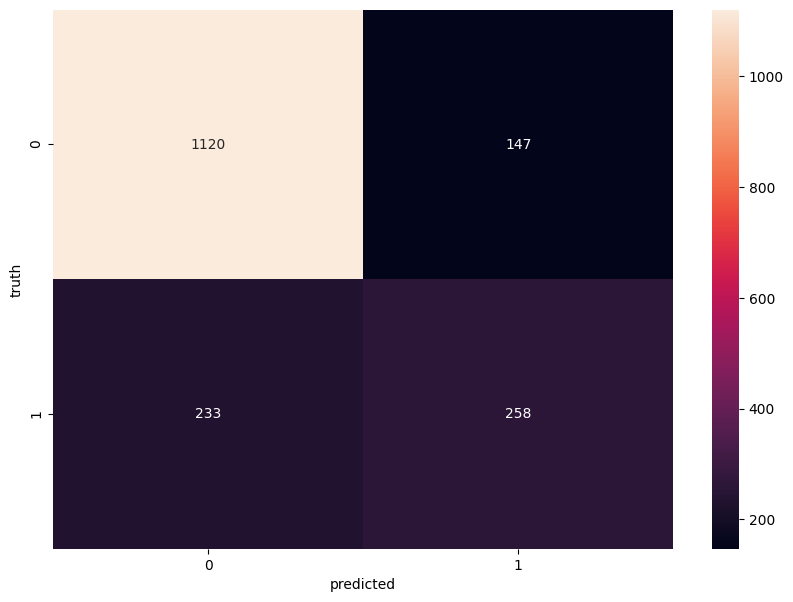

In [50]:
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot = True, fmt ='d')
plt.xlabel('predicted')
plt.ylabel('truth')


In [51]:
round((888+222)/(888+111+186+222),2) # accuracy

0.79

In [52]:
round(888/(888+186),2) # precission for 0 = (no. of correct 0 predictions)/(all 0 predictions)

0.83

In [53]:
round(888/(888+111),2) # recall for 0 = (no. of correct 0 predictions)/(all 0 truth)

0.89

In [54]:
round(2*(0.83*0.89)/(0.83+0.89), 2) # f1 score for 0 = 2 * (precission * recall)/(precission + recall)

0.86

In [55]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer = 'adam', loss= loss, metrics = ['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight=weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred)
    
    print("Classification Report: \n", classification_report(y_test, y_pred))
    
    return y_pred


In [56]:
y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
165/165 [==============================] - 1s 3ms/step - loss: 0.5021 - accuracy: 0.7450
Epoch 2/100
165/165 [==============================] - 1s 3ms/step - loss: 0.4339 - accuracy: 0.7867
Epoch 3/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4193 - accuracy: 0.7954
Epoch 4/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4156 - accuracy: 0.7983
Epoch 5/100
165/165 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8043
Epoch 6/100
165/165 [==============================] - 1s 3ms/step - loss: 0.4118 - accuracy: 0.8047
Epoch 7/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4096 - accuracy: 0.8074
Epoch 8/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.8075
Epoch 9/100
165/165 [==============================] - 1s 4ms/step - loss: 0.4077 - accuracy: 0.8064
Epoch 10/100
165/165 [==============================] - 1s 5ms/step - loss: 0.4070 - accura

## Undersampling

In [57]:
y_test.value_counts()

0    1267
1     491
Name: Churn, dtype: int64

In [58]:
count_churn_0, count_churn_1 = df1.Churn.value_counts()
count_churn_0, count_churn_1

(5163, 1869)

In [59]:
df_churn_0 = df2[df2.Churn == 0]
df_churn_1 = df2[df2.Churn == 1]

In [60]:
df_churn_0_under = df_churn_0.sample(count_churn_1) # undersampling class 0 here bringing it down to class 1's size

In [61]:
df_test_under = pd.concat([df_churn_0_under, df_churn_1], axis =0) # concating them both to make one whole dataset of equal size of classes

df_test_under.shape

(3738, 27)

In [62]:
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [63]:
X = df_test_under.drop(['Churn'], axis = 1)
y = df_test_under['Churn']

In [64]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=15, stratify=y)

In [65]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [66]:
y_pred = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6103 - accuracy: 0.6819
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5181 - accuracy: 0.7458
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4965 - accuracy: 0.7572
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4891 - accuracy: 0.7599
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4844 - accuracy: 0.7639
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4802 - accuracy: 0.7689
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4785 - accuracy: 0.7682
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.7702
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4758 - accuracy: 0.7689
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4719 - accuracy: 0.7686
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.4134 - accuracy: 0.8120
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8100
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4130 - accuracy: 0.8100
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8087
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4111 - accuracy: 0.8107
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8043
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4116 - accuracy: 0.8064
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4100 - accuracy: 0.8144
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4097 - accuracy: 0.8137
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4095 - accuracy: 0.8107
Epoch 93/100


## Oversampling

In [67]:
count_churn_0, count_churn_1

(5163, 1869)

In [68]:
df_churn_1_over = df_churn_1.sample(count_churn_0, replace = True) # oversampling class 1 to match size of class 0 by generating duplicate copies of class 1
df_churn_1_over.shape

(5163, 27)

In [69]:
df_test_over = pd.concat([df_churn_0, df_churn_1_over], axis =0)
df_test_over.shape

(10326, 27)

In [70]:
X = df_test_over.drop(['Churn'], axis = 1)
y = df_test_over['Churn']

In [71]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=15, stratify=y)

In [72]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [73]:
y_pred = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5453 - accuracy: 0.7420
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4989 - accuracy: 0.7596
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4903 - accuracy: 0.7633
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4864 - accuracy: 0.7674
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4811 - accuracy: 0.7706
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4785 - accuracy: 0.7667
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4760 - accuracy: 0.7728
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4724 - accuracy: 0.7735
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4698 - accuracy: 0.7742
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4669 - accura

## Oversampling SMOTE

In [74]:
X = df2.drop(['Churn'], axis =1)
y = df2['Churn']

y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [76]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority') 
X_sm, y_sm = smote.fit_resample(X, y) # generating synthetic samples for class 1 to match size of class 0

In [77]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [78]:
X_train, X_test, y_train, y_test = tts(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [81]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [82]:
 y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [83]:
y_pred = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1)

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5425 - accuracy: 0.7322
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4693 - accuracy: 0.7774
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4587 - accuracy: 0.7814
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4521 - accuracy: 0.7898
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4482 - accuracy: 0.7918
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4445 - accuracy: 0.7944
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4410 - accuracy: 0.7971
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4383 - accuracy: 0.7982
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4349 - accuracy: 0.8021
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4326 - accura

## Ensemble Undersamplig

In [87]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [88]:
X = df2.drop(['Churn'], axis =1)
y = df2['Churn']

In [89]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=15, stratify=y)

In [90]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [92]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [94]:
df3_churn_0 = df3[df3['Churn'] == 0]
df3_churn_1 = df3[df3['Churn'] == 1]

In [95]:
df3_churn_0.shape, df3_churn_1.shape

((4130, 27), (1495, 27))

In [96]:
def get_train_batch(df_majority, df_minority, start, end): 
    df_train = pd.concat([df_majority[start : end], df_minority], axis =0) # making batchs of class 0 to match size of class 1
    
    X_train = df_train.drop(['Churn'], axis =1)
    y_train = df_train['Churn']
    
    return X_train, y_train

In [97]:
X_train, y_train = get_train_batch(df3_churn_0, df3_churn_1, 0, 1495) 
X_train.shape

(2990, 26)

In [98]:
y_pred1 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1) # 1st batch model trainnig result

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6202 - accuracy: 0.6742
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5237 - accuracy: 0.7492
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5005 - accuracy: 0.7652
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.7662
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4858 - accuracy: 0.7696
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4829 - accuracy: 0.7702
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4807 - accuracy: 0.7732
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4779 - accuracy: 0.7722
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.7739
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4765 - accuracy: 0.7699
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.4123 - accuracy: 0.8067
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4099 - accuracy: 0.8080
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4097 - accuracy: 0.8097
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4097 - accuracy: 0.8064
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4097 - accuracy: 0.8077
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4088 - accuracy: 0.8100
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4081 - accuracy: 0.8087
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4073 - accuracy: 0.8120
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4089 - accuracy: 0.8097
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4055 - accuracy: 0.8114
Epoch 93/100


In [99]:
X_train, y_train = get_train_batch(df3_churn_0, df3_churn_1, 1495, 2990)
X_train.shape

(2990, 26)

In [100]:
y_pred2 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1) # 2nd batch model trainnig result

Epoch 1/100
94/94 [==============================] - 2s 12ms/step - loss: 0.6244 - accuracy: 0.6696
Epoch 2/100
94/94 [==============================] - 1s 11ms/step - loss: 0.5315 - accuracy: 0.7495
Epoch 3/100
94/94 [==============================] - 1s 11ms/step - loss: 0.5062 - accuracy: 0.7542
Epoch 4/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4978 - accuracy: 0.7582
Epoch 5/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4927 - accuracy: 0.7619
Epoch 6/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4893 - accuracy: 0.7635
Epoch 7/100
94/94 [==============================] - 1s 9ms/step - loss: 0.4854 - accuracy: 0.7676
Epoch 8/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4817 - accuracy: 0.7645
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4793 - accuracy: 0.7706
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4762 - accuracy: 0.7662
Epoch 

Epoch 83/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4001 - accuracy: 0.8094
Epoch 84/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4000 - accuracy: 0.8110
Epoch 85/100
94/94 [==============================] - 1s 5ms/step - loss: 0.3986 - accuracy: 0.8127
Epoch 86/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3959 - accuracy: 0.8087
Epoch 87/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3959 - accuracy: 0.8094
Epoch 88/100
94/94 [==============================] - 0s 5ms/step - loss: 0.3961 - accuracy: 0.8097
Epoch 89/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3961 - accuracy: 0.8100
Epoch 90/100
94/94 [==============================] - 1s 6ms/step - loss: 0.3945 - accuracy: 0.8107
Epoch 91/100
94/94 [==============================] - 1s 7ms/step - loss: 0.3926 - accuracy: 0.8151
Epoch 92/100
94/94 [==============================] - 1s 8ms/step - loss: 0.3946 - accuracy: 0.8130


In [101]:
X_train, y_train = get_train_batch(df3_churn_0, df3_churn_1, 2990, 4130)
X_train.shape

(2635, 26)

In [102]:
y_pred3 = ANN(X_train, y_train, X_test, y_test, "binary_crossentropy", -1) # 3rd batch model trainnig result

Epoch 1/100
83/83 [==============================] - 2s 4ms/step - loss: 0.6399 - accuracy: 0.6455
Epoch 2/100
83/83 [==============================] - 0s 4ms/step - loss: 0.5208 - accuracy: 0.7556
Epoch 3/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4907 - accuracy: 0.7696
Epoch 4/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4824 - accuracy: 0.7769
Epoch 5/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4775 - accuracy: 0.7753
Epoch 6/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4721 - accuracy: 0.7799
Epoch 7/100
83/83 [==============================] - 0s 5ms/step - loss: 0.4683 - accuracy: 0.7841
Epoch 8/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.7757
Epoch 9/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4643 - accuracy: 0.7837
Epoch 10/100
83/83 [==============================] - 0s 4ms/step - loss: 0.4612 - accuracy: 0.7886
Epoch 11/

83/83 [==============================] - 0s 5ms/step - loss: 0.3789 - accuracy: 0.8307
Epoch 84/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3770 - accuracy: 0.8304
Epoch 85/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3763 - accuracy: 0.8307
Epoch 86/100
83/83 [==============================] - 1s 8ms/step - loss: 0.3751 - accuracy: 0.8326
Epoch 87/100
83/83 [==============================] - 1s 11ms/step - loss: 0.3757 - accuracy: 0.8338
Epoch 88/100
83/83 [==============================] - 1s 11ms/step - loss: 0.3742 - accuracy: 0.8361
Epoch 89/100
83/83 [==============================] - 1s 6ms/step - loss: 0.3729 - accuracy: 0.8353
Epoch 90/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3712 - accuracy: 0.8345
Epoch 91/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3722 - accuracy: 0.8334
Epoch 92/100
83/83 [==============================] - 0s 5ms/step - loss: 0.3692 - accuracy: 0.8334
Epoch 93/10

In [105]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)): # taking majority vote
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [106]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

